<a href="https://colab.research.google.com/github/iainmaclachlan/data/blob/main/CFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

**BFF5902 Introduction to Risk Management**

---

Week 4 Cash Flow at Risk example by Iain Maclachlan. 

Provided for illustration only. 

* This is a Jupyter notebook. It can be run in Google Colab or Jupyter Notebook. 
* Adjust inputs in the "Variable Inputs" section.
* To run, select "Runtime" from the menu and then "Run all". 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Assumptions

Input model assumptions

In [2]:
min_sales=70      #minimum guessed sales
max_sales=130     #maximum guessed sales
min_fx=.6         #minimum guessed foreign currency exchange rate
max_fx=.9         #maximum guessed foreign currency exchange rate
fixed=30          #fixed costs
purchase_USD=40   #cost of goods in foreign currency

In [3]:
#@title Variable Inputs
corr = 0#@param {type:"number"}
n =  100000#@param {type:"integer"}
conf = 0.95 #@param {type:"number"}

In [4]:
print("Correlation entered is ",corr)
print("Number of simulation runs chosen is ",n)

Correlation entered is  0
Number of simulation runs chosen is  100000


# Run simulations

Calculate input probability distribution parameters. Assume sales and FX rates are normally distributed.

In [5]:
mean_sales=(min_sales+max_sales)/2
sd_sales=(max_sales-min_sales)/4
mean_fx=(min_fx+max_fx)/2
sd_fx=(max_fx-min_fx)/4

Generate random sales and FX rates by drawing from the normal distribution scaled to match the means and ranges we guessed earlier. Allowance is made for correlating the random numbers. If corr=0, then no correlation. 

The result of the Monte Carlo simulation is a set of uncertain EBIT outcomes that reflects the uncertainty of the input drivers and their relationships.

In [6]:
x=np.random.normal(0,1,n)
y=corr*x+np.sqrt(1-corr**2)*np.random.normal(0,1,n)
sales=x*sd_sales+mean_sales
fx=y*sd_fx+mean_fx

Model of the organisation's earnings before interest and tax (EBIT), i.e. profit. Note the random variables are denoted with a tilde sign to show they are variable. Because the level of sales and the foreign exchange rate (fx) are uncertain variables, it follows that EBIT is also an uncertain variable.

$$ \tilde{EBIT}=\tilde{Sales} - \frac{Purchase}{\tilde{FX}} - Fixed $$

In [7]:
EBIT=sales-purchase_USD/fx-fixed
print("Mean of EBIT =",round(np.mean(EBIT),2))

Mean of EBIT = 16.14


# Charts

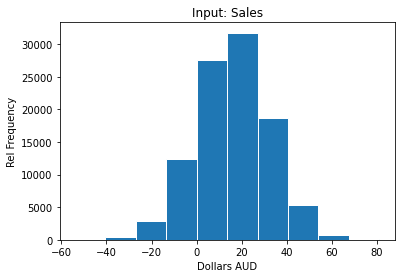

In [8]:
count, bins, patches = plt.hist(EBIT, edgecolor="white", linewidth=1)
plt.xlabel("Dollars AUD")
plt.ylabel("Rel Frequency")
plt.title("Input: Sales")
plt.show()

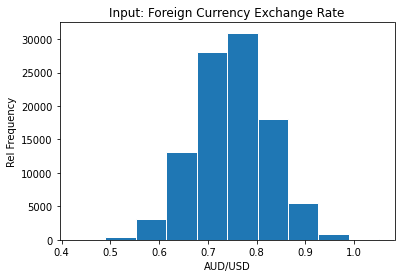

In [9]:
count, bins, patches = plt.hist(fx, edgecolor="white", linewidth=1)
plt.xlabel("AUD/USD")
plt.ylabel("Rel Frequency")
plt.title("Input: Foreign Currency Exchange Rate")
plt.show()

Sample correlation between FX rates and Sales  = 0.0026


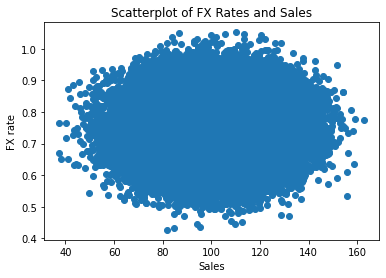

In [10]:
plt.scatter(sales, fx)
plt.xlabel("Sales")
plt.ylabel("FX rate")
plt.title("Scatterplot of FX Rates and Sales")
print("Sample correlation between FX rates and Sales  =", round(np.corrcoef(fx,sales)[0,1],4))
plt.show()

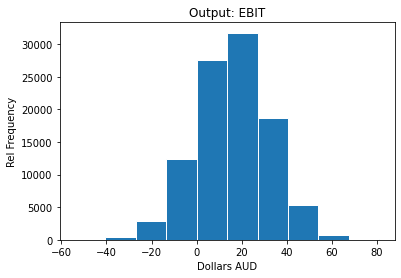

In [11]:
count, bins, patches = plt.hist(EBIT, edgecolor="white", linewidth=1)
plt.xlabel("Dollars AUD")
plt.ylabel("Rel Frequency")
plt.title("Output: EBIT")
plt.show()

Text(0.5, 0.92, 'All simulated scenarios')

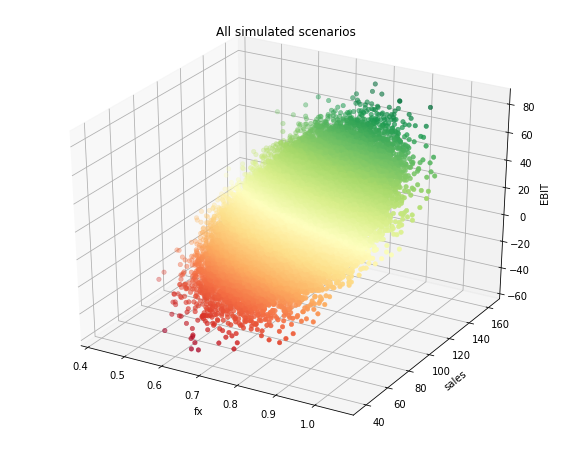

In [12]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(fx, sales, EBIT, c=EBIT, cmap='RdYlGn',linewidth=0.5,marker='o')
ax.set_xlabel("fx")
ax.set_ylabel("sales")
ax.set_zlabel("EBIT",rotation=90)
ax.set_title("All simulated scenarios")


# Risk Analysis and CFaR

Probability of making a loss.

In [13]:
loss_count=sum(EBIT<0)
loss_prob=loss_count/n
print("Number of observed losses",loss_count)
print("Calculated probability of loss",round(loss_prob*100,2),"percent")

Number of observed losses 15672
Calculated probability of loss 15.67 percent


The expected size of loss given that a loss is made. It is the expected consequence from the event of making any loss.

In [14]:
losses=EBIT[EBIT<0]
print("Expected loss if EBIT<0",round(np.mean(losses),2))
print("Maximum loss",round(min(losses),2))
print("Probability of maximum loss",round(1/n*100,6),"percent")

Expected loss if EBIT<0 -8.48
Maximum loss -53.98
Probability of maximum loss 0.001 percent


As you can see the tail of losses extends far beyond its expected value. Management may also be concerned with largest loss they might encounter. One option is to consider only the the maximum loss, but this will be very rare as it only occurs once in the whole simulation exercise (1/n). An alternative is to ask what is the maximum loss that it is reasonably possible to encounter which is the idea behind CFaR.

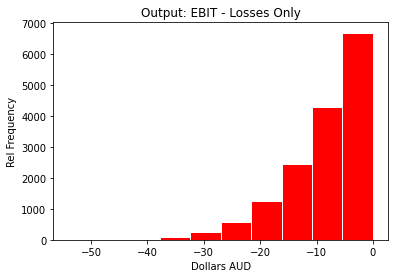

In [15]:
count, bins, patches = plt.hist(EBIT[EBIT<0], edgecolor="white", linewidth=1, facecolor='r')
plt.xlabel("Dollars AUD")
plt.ylabel("Rel Frequency")
plt.title("Output: EBIT - Losses Only")
plt.show()

CFaR (X%) = the lowest EBIT (minimum profit) where there is a probability of X% that EBIT will be not worse. Find CFaR by sorting EBIT and finding the worst ranked level (X) that corresponds to the desired confidence level. 

See what happens when FX and Sales are positively correlated, eg. 0.5. What happens to CFaR? Why is this?

In [16]:
EBIT_sorted=np.sort(EBIT)
X=int((1-conf)*n) 
CFaR=EBIT_sorted[X-1] #Python indexes arrays starting at 0
print("CFaR is",round(CFaR,4),"at a confidence level of",conf)
print("CFaR is the ",X," worst EBIT from ",n," simulation runs")

CFaR is -10.2619 at a confidence level of 0.95
CFaR is the  5000  worst EBIT from  100000  simulation runs


# Other Risk Measures

Common risk measures that are used in conjunction with CFaR are:


*   The range of values below CFaR is commonly called the "extreme tail" or just "tail". The Expected Shortfall (ES) is the expected value of EBIT given that EBIT < CFaR. ES is defined as the average outcome conditional on the outcome being worse than CFaR. It is a useful alternative risk measure to CFaR because it more naturally aligns with the concept of risk as shown in a risk matrix. Note that (1-X%) is the likelihood of losses exceeding CFaR and Exected Shortfall is the expected consequence should that happen.
*   Economic Capital (EC) is the difference between the expected EBIT and CFaR. It represents how much shareholder capital is at risk. Sometimes CFaR modelling is referred to as Economic Capital modelling.




In [17]:
tail_EBIT=EBIT[EBIT<CFaR]
ES_EBIT=np.mean(tail_EBIT)
print("Expected shortfall =",round(ES_EBIT,2))
EC=np.mean(EBIT)-CFaR
print("Economic Capital =",round(EC,2))

Expected shortfall = -17.09
Economic Capital = 26.4


# Using CFaR to Identify Extreme Scenarios

Simulation exercises can guide reverse stress test scenario selection. For example, if we define EBIT < CFaR as financial failure, then all the pairs of input values found in the tail represents a failure scenario. Management can use this information to guide constructing reverse stress tests and premortum scenarios in respect of financial risk.

In [18]:
data=np.array([fx,sales,EBIT])
data_sorted=np.sort(data)
tail_data = data_sorted[:,0:X] #list of tail scenarios
df_tail=pd.DataFrame(data=tail_data,index=['fx','sales','EBIT'])

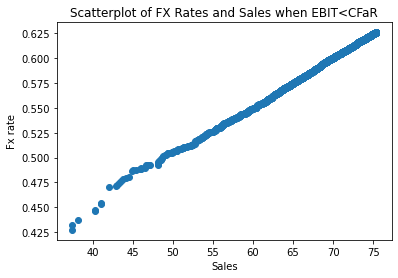

In [19]:
plt.scatter(df_tail.loc[['sales']],df_tail.loc[['fx']])
plt.xlabel("Sales")
plt.ylabel("Fx rate")
plt.title("Scatterplot of FX Rates and Sales when EBIT<CFaR")
plt.show()

# Tail Scenarios

In [20]:
df_tail.T

,fx,sales,EBIT
0,0.427121,37.447483,-53.978584
1,0.432492,37.495600,-53.344406
2,0.437230,38.202445,-52.170847
3,0.446182,40.301415,-50.374313
4,0.447269,40.322733,-49.802276
...,...,...,...
4995,0.626164,75.384491,-10.273387
4996,0.626164,75.386144,-10.268243
4997,0.626170,75.387402,-10.267115
4998,0.626171,75.392479,-10.263787


# Influence of correlation between input drivers

When drivers are positively correlated the FX rate has a greater chance of being low when sales are low. Note this is because we have specified the exchange rate indirectly (i.e. divide USD price to get to AUD price) and we are importing so lower FX rate increases the cost of goods purchased. Consequently, CFaR increases with correlation in this example.

If negatively correlated, then a fall in sales tends to be offset by lower purchasing cost and vice versa. Profits and losses are reduced and CFaR is lower. This is termed a "natural hedge". 

As correlation is not known with certainty, it is also a source of model risk.